# Assignment 1: Basic Statistics

## Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

**Topics Covered:**
- Mean, Median, Mode, Standard Deviation
- Histograms and Boxplots
- Bar Charts for categorical data
- Standardization (Z-score normalization)
- One-Hot Encoding

---
## Step 1: Import Libraries and Load Data

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('datasets/sales_data_with_discounts.csv')

# Display first few rows
print("Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Shape of dataset: (500, 10)

First 5 rows:


,Day,City,BU,Brand,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,Sunday,Bangalore,Furniture,HP,423,895.67,378868.41,8.72,33037.33,345831.08
1,Thursday,Chennai,Grocery,Samsung,464,1022.91,474630.24,22.39,106269.71,368360.53
2,Friday,Kolkata,Furniture,Nike,83,3681.06,305527.98,23.65,72257.37,233270.61
3,Sunday,Mumbai,Grocery,Samsung,242,865.20,209378.40,29.55,61871.32,147507.08
4,Wednesday,Kolkata,Clothing,Dell,233,1249.35,291098.55,10.25,29837.60,261260.95


In [3]:
# Check column names and data types
print("Column Names and Data Types:")
print(df.dtypes)

Column Names and Data Types:
Day                   object
City                  object
BU                    object
Brand                 object
Volume                 int64
Avg Price            float64
Total Sales Value    float64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object


---
## Step 2: Descriptive Statistics

Calculate **Mean**, **Median**, **Mode**, and **Standard Deviation** for numerical columns.

- **Mean**: Average value
- **Median**: Middle value when sorted
- **Mode**: Most frequent value
- **Standard Deviation**: How spread out the values are

In [4]:
# Get list of numerical columns
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

print("=== Descriptive Statistics ===")
print("=" * 50)

# Calculate statistics for each numerical column
for column in numerical_columns:
    print("\nColumn:", column)
    print("-" * 30)
    
    # Calculate mean
    mean_value = df[column].mean()
    print("Mean:", round(mean_value, 2))
    
    # Calculate median
    median_value = df[column].median()
    print("Median:", round(median_value, 2))
    
    # Calculate mode
    mode_value = df[column].mode()[0]
    print("Mode:", round(mode_value, 2))
    
    # Calculate standard deviation
    std_value = df[column].std()
    print("Standard Deviation:", round(std_value, 2))

=== Descriptive Statistics ===

Column: Volume
------------------------------
Mean: 259.32
Median: 270.5
Mode: 21
Standard Deviation: 143.17

Column: Avg Price
------------------------------
Mean: 2512.74
Median: 2557.85
Mode: 101.63
Standard Deviation: 1380.63

Column: Total Sales Value
------------------------------
Mean: 644295.32
Median: 472940.25
Mode: 2337.49
Standard Deviation: 535815.36

Column: Discount Rate (%)
------------------------------
Mean: 17.4
Median: 17.16
Mode: 29.49
Standard Deviation: 7.38

Column: Discount Amount
------------------------------
Mean: 111417.09
Median: 74046.44
Mode: 191.44
Standard Deviation: 112192.51

Column: Net Sales Value
------------------------------
Mean: 532878.24
Median: 390115.74
Mode: 1746.71
Standard Deviation: 447248.29


---
## Step 3: Histograms

Histograms show the distribution of numerical data. We can see:
- If data is skewed (left or right)
- If there are any outliers
- The most common range of values

Creating Histograms...


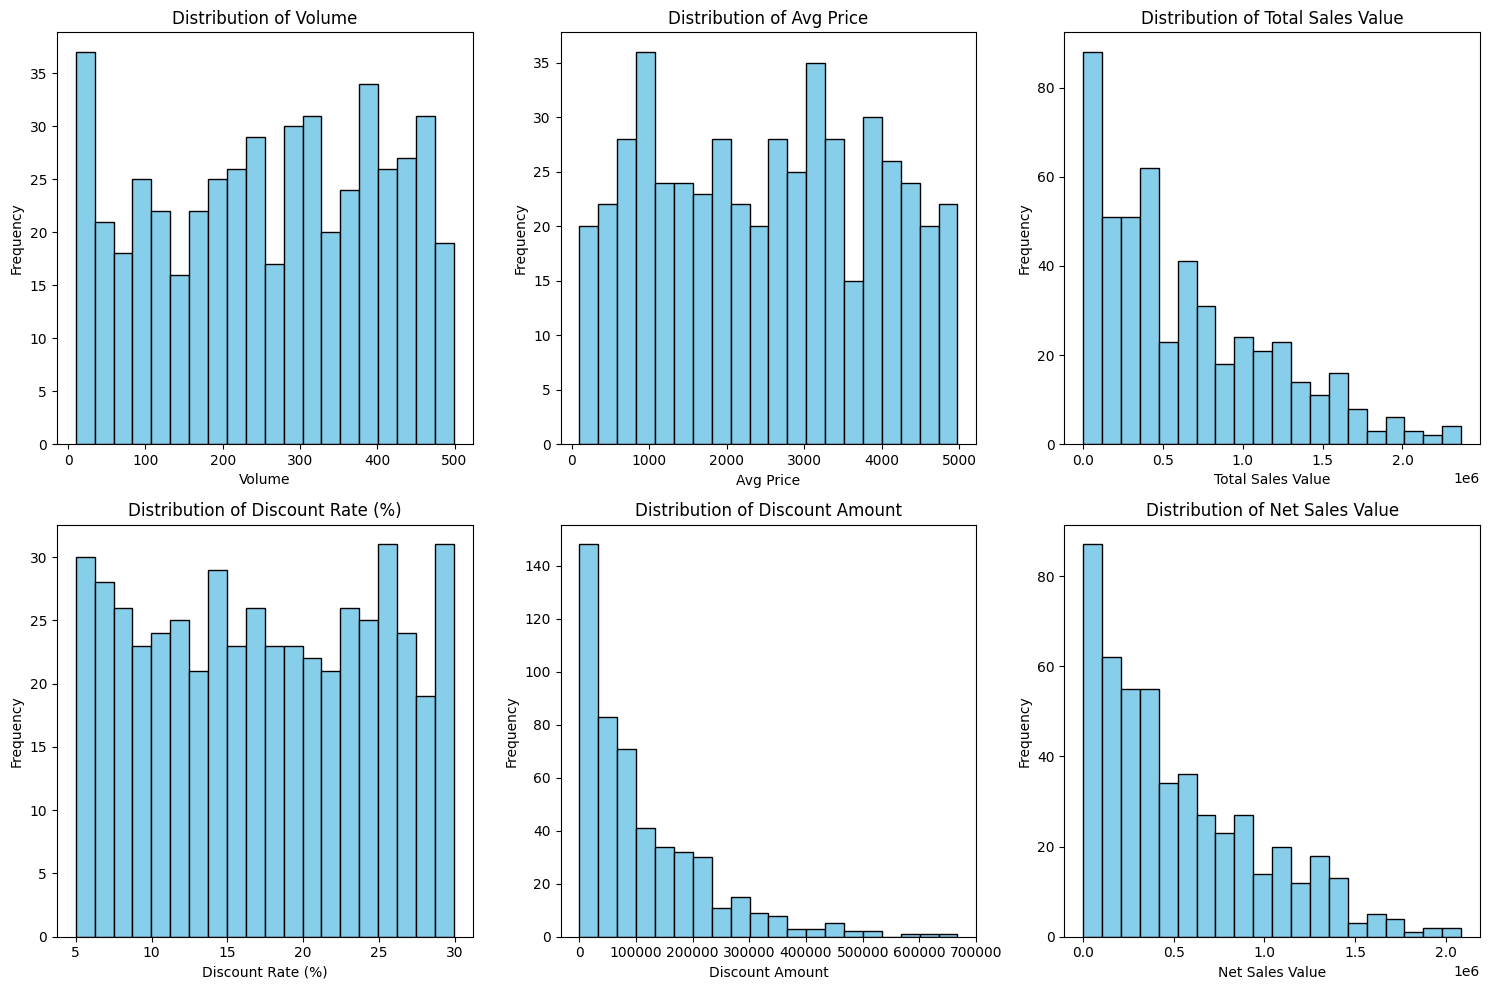


Histograms saved as 'histograms.png'


In [5]:
# Create histograms for numerical columns
print("Creating Histograms...")

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot histogram for each column
for i in range(len(numerical_columns)):
    column = numerical_columns[i]
    axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title('Distribution of ' + column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Interpretation:**
- Most distributions show right skewness (long tail on the right)
- Volume has most values concentrated in lower range
- Prices and Sales values vary widely

---
## Step 4: Boxplots

Boxplots help identify:
- **Outliers**: Points outside the whiskers
- **Interquartile Range (IQR)**: The box shows middle 50% of data
- **Median**: The line inside the box

Creating Boxplots...


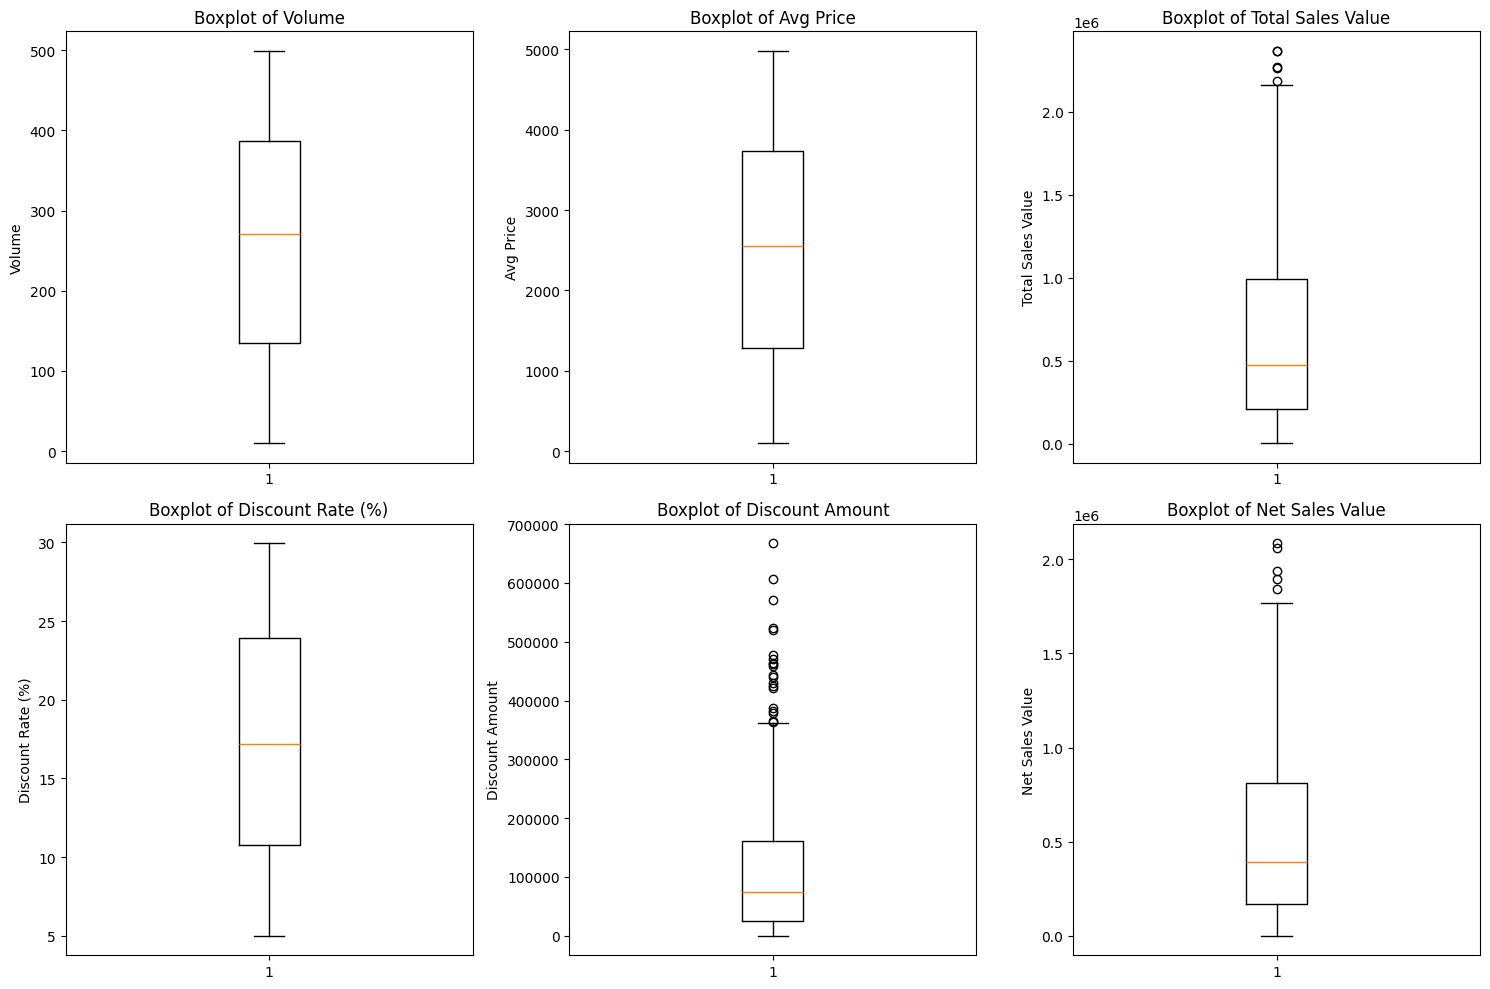


Boxplots saved as 'boxplots.png'


In [6]:
# Create boxplots for numerical columns
print("Creating Boxplots...")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i in range(len(numerical_columns)):
    column = numerical_columns[i]
    axes[i].boxplot(df[column].dropna())
    axes[i].set_title('Boxplot of ' + column)
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

**Interpretation:**
- Several columns show outliers (dots above/below whiskers)
- High-value items like mobile phones create outliers in price columns

---
## Step 5: Bar Charts for Categorical Data

Bar charts show the count/frequency of each category.

Creating Bar Charts...


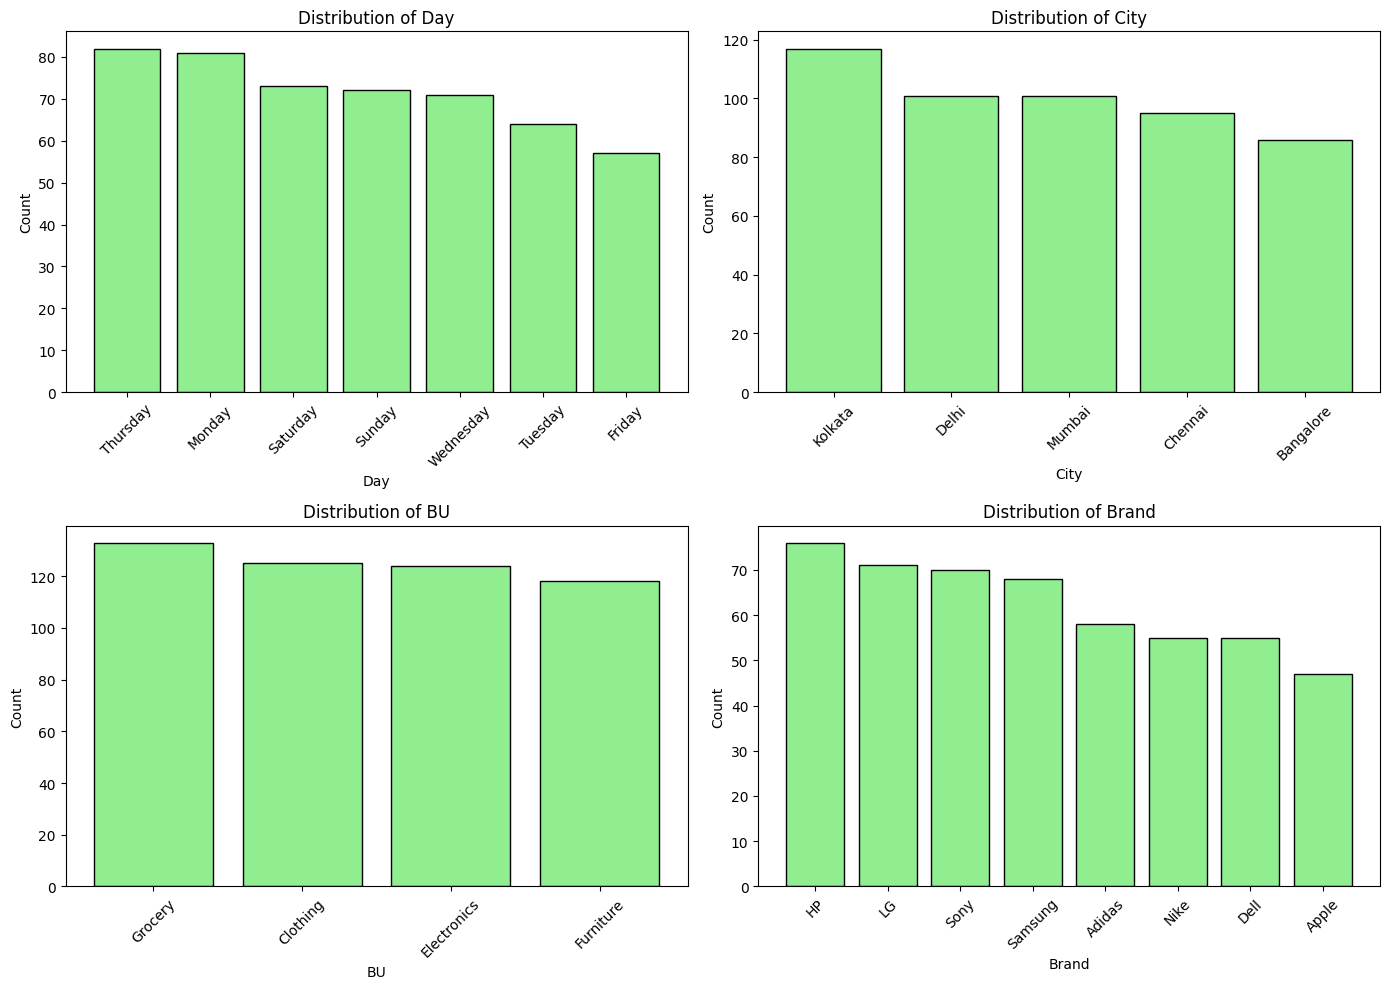


Bar charts saved as 'bar_charts.png'


In [7]:
# Identify categorical columns
categorical_columns = ['Day', 'City', 'BU', 'Brand']

print("Creating Bar Charts...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i in range(len(categorical_columns)):
    column = categorical_columns[i]
    
    # Count frequency of each category
    value_counts = df[column].value_counts()
    
    # Create bar chart
    axes[i].bar(value_counts.index, value_counts.values, color='lightgreen', edgecolor='black')
    axes[i].set_title('Distribution of ' + column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Interpretation:**
- Sales data is fairly distributed across days of the week
- Different cities and brands have varying sales volumes

---
## Step 6: Standardization (Z-Score Normalization)

**What is Standardization?**

Standardization transforms data so that it has:
- Mean = 0
- Standard Deviation = 1

**Formula:** z = (x - mean) / standard_deviation

**Why Standardize?**
- Makes different columns comparable
- Required by many machine learning algorithms

In [8]:
# Standardization
print("=== Standardization ===")
print("\nBefore Standardization:")
print(df[numerical_columns].head())

# Create a copy of dataframe for standardized values
df_standardized = df.copy()

# Apply standardization to each numerical column
for column in numerical_columns:
    # Calculate mean
    mean = df[column].mean()
    
    # Calculate standard deviation
    std = df[column].std()
    
    # Apply z-score formula: (x - mean) / std
    df_standardized[column] = (df[column] - mean) / std

print("\nAfter Standardization:")
print(df_standardized[numerical_columns].head())

# Verify: mean should be ~0, std should be ~1
print("\nVerification (should be close to 0):")
print("Mean after standardization:")
for column in numerical_columns:
    print(column + ":", round(df_standardized[column].mean(), 4))

=== Standardization ===

Before Standardization:
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0     423     895.67          378868.41               8.72         33037.33   
1     464    1022.91          474630.24              22.39        106269.71   
2      83    3681.06          305527.98              23.65         72257.37   
3     242     865.20          209378.40              29.55         61871.32   
4     233    1249.35          291098.55              10.25         29837.60   

   Net Sales Value  
0        345831.08  
1        368360.53  
2        233270.61  
3        147507.08  
4        261260.95  

After Standardization:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  1.143276  -1.171256          -0.495370          -1.175808        -0.698618   
1  1.429647  -1.079095          -0.316648           0.676355        -0.045880   
2 -1.231506   0.846226          -0.632246           0.847074        -0.349040   
3 

---
## Step 7: One-Hot Encoding

**What is One-Hot Encoding?**

Converts categorical variables (text) into numerical format using 0s and 1s.

Example:
- Original: City = [A, B, C]
- Encoded: City_A = [1,0,0], City_B = [0,1,0], City_C = [0,0,1]

**Why One-Hot Encode?**
- Machine learning algorithms need numerical data

In [9]:
# One-Hot Encoding
print("=== One-Hot Encoding ===")

print("\nOriginal dataset shape:", df.shape)
print("Categorical columns:", categorical_columns)

# Apply one-hot encoding using pandas get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_columns)

print("\nAfter One-Hot Encoding:")
print("New dataset shape:", df_encoded.shape)

print("\nNew columns created:")
new_columns = [col for col in df_encoded.columns if col not in df.columns]
for col in new_columns[:10]:  # Show first 10 new columns
    print(" -", col)
print("... and", len(new_columns) - 10, "more columns")

print("\nSample of encoded data:")
df_encoded.head()

=== One-Hot Encoding ===

Original dataset shape: (500, 10)
Categorical columns: ['Day', 'City', 'BU', 'Brand']

After One-Hot Encoding:
New dataset shape: (500, 30)

New columns created:
 - Day_Friday
 - Day_Monday
 - Day_Saturday
 - Day_Sunday
 - Day_Thursday
 - Day_Tuesday
 - Day_Wednesday
 - City_Bangalore
 - City_Chennai
 - City_Delhi
... and 14 more columns

Sample of encoded data:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,...,BU_Furniture,BU_Grocery,Brand_Adidas,Brand_Apple,Brand_Dell,Brand_HP,Brand_LG,Brand_Nike,Brand_Samsung,Brand_Sony
0,423,895.67,378868.41,8.72,33037.33,345831.08,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
1,464,1022.91,474630.24,22.39,106269.71,368360.53,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,83,3681.06,305527.98,23.65,72257.37,233270.61,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
3,242,865.20,209378.40,29.55,61871.32,147507.08,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
4,233,1249.35,291098.55,10.25,29837.60,261260.95,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


---
## Summary

In this assignment, we learned:

1. **Descriptive Statistics** - Calculating mean, median, mode, and standard deviation
2. **Histograms** - Visualizing data distributions
3. **Boxplots** - Identifying outliers and IQR
4. **Bar Charts** - Analyzing categorical variables
5. **Standardization** - Z-score normalization for numerical data
6. **One-Hot Encoding** - Converting categorical data to numerical format